# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 2. Датафреймы `pandas`: часть 2

Импортируем библиотеку `pandas` с сокращённым названием:

In [1]:
import pandas as pd

В этом практикуме мы продолжаем работать с данными из файла `beasts.csv`, который содержит характеристики фантастических существ. Переменные в таблице:

* `Name`: название существа;
* `Class`: вид существа (если есть, если нет, дублируется название);
* `Classification`: классификация Министерства Магии по уровням опасности;
* `Colour`: цвет тела;
* `Eye`: цвет глаз;
* `Native`: происхождение и распространение;
* `Size`: размер в дюймах.

Загрузим данные из CSV-файла:

In [2]:
df = pd.read_csv("beasts.csv")

В предыдущем практикуме мы добавили в этот датафрейм бинарный столбец `Dragon` со значениями 1, если существо – дракон, и значениями 0 – если существо – не дракон:

In [3]:
df["Dragon"] = (df["Class"] == "Dragon").astype(int)
df["Dragon"].value_counts()

0    71
1    10
Name: Dragon, dtype: int64

В предыдущем практикуме мы также добавили в этот датафрейм числовой столбец `Danger` с числовыми значениями уровня опасности (целые значения от 1 до 5):

In [4]:
df["Danger"] = df["Classification"].apply(len)
df["Danger"].value_counts()

3    27
4    20
5    18
2    14
1     2
Name: Danger, dtype: int64

### Задача 1

Добавьте в датафрейм новый признак `DangerAgg`, который будет представлять собой закодированный уровень опасности существа: 

* `High`: если класс Министерства Магии равен 4 или 5 (`XXXX` или `XXXXX`);
* `Medium`: если класс Министерства Магии равен 3 (`XXX`);
* `Low`: если класс Министерства Магии равен 1 или 2 (`X` и `XX`).

In [5]:
# вариант с заменой через .replace() и словарь

df["DangerAgg"] = df["Danger"].replace({5 : "High", 
                                        4 : "High", 
                                        3 : "Medium", 
                                        2 : "Low", 
                                        1 : "Low"})

In [6]:
# вариант со своей функцией и apply()

# пишем свою функцию для одной ячейки
# предусматриваем None на случай пропусков
# здесь их нет, но вообще полезно учитывать,
# иначе при применении функции в apply()
# все сломается

def recode(x):
    if x > 3:
        y = "High"
    elif x > 2:
        y = "Medium"
    elif x > 0:
        y = "Low"
    else:
        y = None # само переделается в NaN
    return y

In [7]:
# применяем recode() ко всем ячейкам в Danger
# проверяем результаты

df["DangerAgg"] = df["Danger"].apply(recode)
df["DangerAgg"].value_counts()

High      38
Medium    27
Low       16
Name: DangerAgg, dtype: int64

### Задача 2

Определите моду по столбцу `Eye`. Заполните единственный пропуск в этом столбце модой. Проверьте, что пропусков в столбце не осталось.

**Подсказка:** методы `.mode()` и `.fillna()`.

In [8]:
# так как мода может быть не одна,
# возвращается всегда столбец pandas Series,
# здесь он из одной строки с индексом 0

df["Eye"].mode()

0    No data
dtype: object

In [9]:
# забираем элемент с индексом 0

m = df["Eye"].mode()[0]
print(m)

No data


In [10]:
# заполняем им пропуски в Eye и сразу сохраняем изменения

df["Eye"].fillna(m, inplace = True)

In [11]:
# проверяем, что пропусков не осталось

df["Eye"].isna().sum()

0

### Задача 3

Выведите описательные статистики для столбца `Size`. Отдельно вычислите среднее и заполните пропущенные значения средним арифметическим. Снова выведите описательные статистики для столбца `Size` и сравните результаты.

In [12]:
# внимание на среднее

df["Size"].describe()

count     28.000000
mean     147.358929
std      178.181732
min        0.050000
25%       11.500000
50%       69.000000
75%      189.000000
max      600.000000
Name: Size, dtype: float64

In [13]:
# считаем среднее отдельно
# и заполняем пропуски им

avg = df["Size"].mean()
df["Size"].fillna(avg, inplace = True)

In [14]:
# сравниваем результаты:
# все ячейки заполнены, count = 81
# среднее не изменилось
# остальное изменилось, кроме min и max

df["Size"].describe()

count     81.000000
mean     147.358929
std      103.514232
min        0.050000
25%      147.358929
50%      147.358929
75%      147.358929
max      600.000000
Name: Size, dtype: float64

> Из-за того, что мы 53 пропуска заполнили средним (одинаковыми значениями 147.358929), этих значений оказалось довольно много, и теперь и среднее, и нижний квартиль, и медиана, и верхний квартиль оказались равными примерно 147.36. Стандартное отклонение как показатель разнообразия наблюдений осталось довольно высоким только из-за того, что в выборке есть очень маленькое значение около 0 и очень большое значение 600. Этот пример служит иллюстрацией того, что заполнение пропусков решает некоторые технические проблемы, однако если пропусков много, а данных мало, содержательно заполнение средним/медианой/модой не сделает датасет более интересным и полезным для анализа. 

### Задача 4

Сгруппируйте строки по уровню опасности существа и выведите описательные статистики для столбца `Size`. 

**Подсказка:** метод `.groupby()`.

In [15]:
df.groupby("Danger")["Size"].describe()

,count,mean,std,min,25%,50%,75%,max
Danger,,,,,,,,
1,2.0,78.679464,97.127430,10.000000,44.339732,78.679464,113.019196,147.358929
2,14.0,81.825893,69.452754,0.050000,9.000000,103.679464,147.358929,147.358929
3,27.0,127.181349,47.013420,8.000000,147.358929,147.358929,147.358929,147.358929
4,20.0,134.651250,42.578702,12.000000,147.358929,147.358929,147.358929,180.000000
5,18.0,250.346131,156.893847,147.358929,147.358929,163.679464,291.000000,600.000000


### Задача 5

Сгруппируйте строки по столбцу `Dragon` и по каждой группе выведите среднее значение `Size` и медианное значение `Danger`.

In [16]:
# в agg() указываем словарь, в нем описываем,
# для какого столбца какую функцию для агрегирования использовать

df.groupby("Dragon").agg({"Size" : "mean", 
                         "Danger" : "median"})

,Size,Danger
Dragon,,
0,128.084457,3.0
1,284.207679,5.0


**Дополнительно.** Любой результат группировки и агрегирования (и вообще любой датафрейм) можно выгрузить в виде таблицы в LaTeX или Word с помощью методов `.to_latex()` или `.to_html()`:

In [17]:
tab = df.groupby("Dragon").agg({"Size" : "mean", "Danger" : "median"})

# код LaTex для таблицы выше, можно доработать

print(tab.to_latex())

\begin{tabular}{lrr}
\toprule
{} &        Size &  Danger \\
Dragon &             &         \\
\midrule
0      &  128.084457 &     3.0 \\
1      &  284.207679 &     5.0 \\
\bottomrule
\end{tabular}



In [18]:
# код HTML для таблицы выше

print(tab.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Size</th>
      <th>Danger</th>
    </tr>
    <tr>
      <th>Dragon</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>128.084457</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>284.207679</td>
      <td>5.0</td>
    </tr>
  </tbody>
</table>


In [19]:
# если экспортируем HTML в файл с расширением .htm,
# его можно будет открыть в помощью Word и аналогов
# и скопировать оттуда таблицу в текстовом формате

tab.to_html("result.htm")

### Задача 6

Сформулируйте принципиальную разницу между гистограммой и столбиковой диаграммой. Постройте подходящий вид графика для визуализации следующих показателей:

* размер существа;
* уровень опасности существа.

**Подсказка:** метод `.hist()` и метод `.bar()` в наборе методов `.plot()`.

**Важно.** Гистограмма – график для количественных данных, так как ее построение предполагает упорядочение значений от меньшего к большему, разделение этого диапазона на равные интервалы и подсчет того, сколько наблюдений попадает в каждый интервал. Гистограмму невозможно построить для текстовых данных, так как упорядочение в математическом смысле выполнить нельзя. Если данные качественные, но значения закодированы числами, технически получить гистограмму можно, но она будет бессмысленной. 

Столбиковая диаграмма – график для качественных данных или для данных в порядковой шкале с малым числом уникальных значений, он просто сопоставляет категории и соответствующие им частоты. Столбцы в такой диаграмме мы можем упорядочить как угодно, от самой частой категории к самой редкой, от самой редкой к самой частой, или просто расположить категории в алфавитном порядке. Для количественных данных, особенно, если уникальных значений много, столбиковую диаграмму технически построить можно, но бессмысленно, получится неупорядоченный набор столбцов, причем большинство столбцов будет высоты 1.

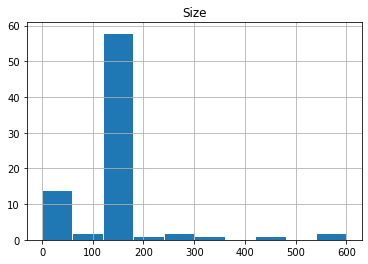

In [20]:
# размер существа – числовой показатель
# строим гистограмму для Size из df
# цвет границ столбцов – белый для наглядности

df.hist("Size", edgecolor = "white");

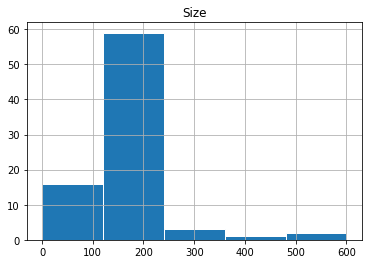

In [21]:
# уменьшим число столбцов, чтобы получить
# меньше столбцов, но более широких

df.hist("Size", edgecolor = "white", bins = 5);

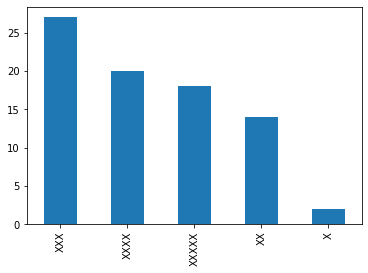

In [22]:
# уровень опасности – порядковая шкала от 1 до 5,
# строим столбиковую диаграмму, но не по исходному столбцу, 
# а по таблице частот для него (иначе никак)

tab = df["Classification"].value_counts()
tab.plot.bar();

О более красивом оформлении графиков и нюансах их построения мы поговорим в следующий раз, а пока просто маленькая иллюстрация, почему столбиковая диаграмма для числового столбца с разнообразными значениями – плохая идея:

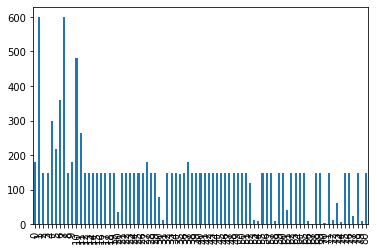

In [23]:
df["Size"].plot.bar();